# Feed Forward Neural Networks

In this notebook, we'll explore the use of feed-forward neural networks for text classification. The example uses sentiments from Amazon product reviews as an example since the dataset is relatively small. 

If you would like to try this on a larger dataset, you can try the [Twitter sentiment dataset](http://help.sentiment140.com/for-students) at the end of the lab.

For this notebook, we will use Keras, which is a Python library for building neural networks. Neural networks are generally quite expensive to train so for the purposes of demonstration we will use the [Amazon product reviews](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences), available in the UCI dataset repository.

First we will import a standard set of libraries, read the data from a CSV, and generate training and test sets.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Feature Transformation
from sklearn.feature_extraction.text import CountVectorizer

# Evaluation
from sklearn.model_selection import train_test_split
import tensorflow as tf
# Deep Learning
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation

## Load and Pre-Process the Data

In [10]:
df = pd.read_csv('../data/amazon_cells_labelled.txt', 
                 sep='\t', 
                 header=None, 
                 names=['Sentence','Label'], 
                 error_bad_lines=False)

sentences = df['Sentence'].values
y = df['Label'].values

(sentences_train, sentences_test, 
     y_train, y_test) = train_test_split(sentences, y, test_size=0.25, random_state=1000)

## Vectorize the Training and Test Sets

We need to represent the data as a vector of words. For this, we use scikit-learn's `CountVectorizer` function, which takes the text and creates a sparse matrix with counts and occurences of each word. The resulting veature vector is 750x1546.  There are 750 rows, where each row is a sample in the training set. There are 1546 columns, where each column represents a word in the resulting vocabulary. The resulting data structure is a sparse matrix, which is a matrix that is optimized for storage when there are only a few non-zero elements.

In [11]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<750x1546 sparse matrix of type '<class 'numpy.int64'>'
	with 6817 stored elements in Compressed Sparse Row format>

## Build the Neural Network

Below we build a neural network, we tell the first layer the input dimensions and subsequently compile the model. We can see that there are 15,470 parameters for the first layer, which is the number of input dimenions, times the number of nodes, plus the number of nodes (one additional parameter for each node for bias).

In [12]:
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                15470     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 15,481
Trainable params: 15,481
Non-trainable params: 0
_________________________________________________________________


## Training

Each iteration is called an epoch; we run the training for 100 epochs to see how training loss and accuracy evolve over epochs.  You must also tune the batch size, which is responsible for how many samples to use in a single epoch.

In [13]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

## Evaluation

We can look at training and testing accuracy, as well as how accuracy evolves over time to understand whether the model was overfit.

In [14]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.7880


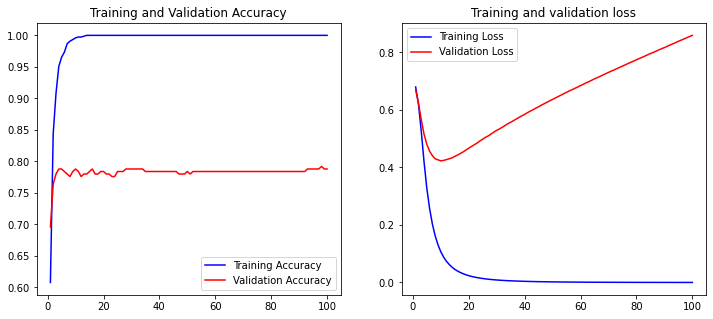

In [15]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    plt.plot(x, val_loss, 'r', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)

---

In [18]:
df = pd.read_csv('../data/training.1600000.processed.noemoticon.csv.gz',
                 header=None,
                 names=['Label','Sentence'],
                 usecols=[0,5],
                 encoding='latin-1',
                 compression='gzip',
                 error_bad_lines=False)
